In [1]:
%matplotlib notebook

In [2]:
from scipy.stats import linregress
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os

QUESTIONS

1. Popular varietals:
a) what regions produce highest quantity cabernet, merlot, blended varietals?
b) Of all the wines in the dataset, what is the most common/least common varietal in the top ten/or top 10% rated wines?
c) the least common varietal in the top 10/10% - does that make it more valuable because it is less common AND made it to the top?
2. BLENDS:
a) blends are said to be more complex and enhanced flavors - are blends frequently in the top rated wines? 
b) Is it more expensive to make blends because you have to experiment with combinations? 
c) does that make the wine itself more expensive? 
d. What regions produce the highest quantity of blends OR highest rated blends?

POSSIBLE DATA SET ISSUES

1. Who is using this ratings app?
a) For example, if it is not heavily used in one particular country, say France, are we getting an accurate picture of preference? Would a French person rate an wine from the United States lower because of bias?

In [3]:
wine_df = pd.read_csv('Wine_data.csv', encoding="ISO-8859-1")

wine_df.head(20)

,Name,Rating,Winery,Area,Province,Country,Varietal,Vintage,Style,Wine Type,ID
0,IV,93.433789,Layor Wines,Nova Scotia,NaN,Canada,Vidal,2013,Dessert,White,55663e3e942360030000000e
1,Layor Gold,90.627673,Layor Wines,Nova Scotia,NaN,Canada,Vidal,2013,Dessert,White,55663e00942360030000000d
2,The Evangelist - Late Harvest Viognier,89.971973,Ascension Cellars,Central Coast,CA,USA,Viognier,2012,Dessert,White,5564efe1b4f0c10300000058
3,Soul Shaker,89.506316,Ascension Cellars,Central Coast,CA,USA,"Cabernet Sauvignon, Petit Verdot, Syrah, Merlot",2012,NaN,Red,5564efe1b4f0c1030000009c
4,"Dalliance ""GSMv""",89.421973,Ascension Cellars,Central Coast,CA,USA,"Grenache, Syrah, Mourvedre, Viognier",2011,NaN,Red,5564efe1b4f0c1030000009b
5,Estate Show Pony Paso Robles Red Cedar Vineyard,88.997799,Clayhouse Wines,San Luis Obispo,CA,USA,Petite Sirah,2012,NaN,Red,5564efe1b4f0c10300000004
6,"Ascendance ""Melange""",88.939649,Ascension Cellars,Central Coast,CA,USA,"Cabernet Sauvignon, Merlot",2011,NaN,Red,5564efe1b4f0c10300000036
7,Halo Viognier,88.832579,Ascension Cellars,Central Coast,CA,USA,Viognier,2014,NaN,White,5564efe1b4f0c10300000035
8,Duca Bortini Vaporello 2014,88.182936,Duca Bortini,Trentino,Trentino,Italy,"Lambrusco, Merlot",2014,NaN,Red,5e673b734d42ee2d694c0703
9,Chateau Cailleteau Bergeron OZ de Cailleteau 2015,88.121973,Chateau Cailleteau Bergeron,Blaye Cotes de Bordeaux,NaN,France,Bordeaux Red Blend,2015,NaN,Red,5e4c9868c2f8c4663fc3d28a


In [4]:
#Data Cleanup
wine_df['Country'] = wine_df['Country'].replace({'United States': 'USA', 'California': 'USA', 'Franc': 'France', 'French': 'France'})
cleaned_df = wine_df.loc[(wine_df['Country'] != 'Blind') & (wine_df['Country'] != 'Macedonia')]


In [7]:
# Store Variables

varietals_split = cleaned_df['Varietal'].str.split(',\s+', expand=True).stack().value_counts()
print(varietals_split)


varietals_count = cleaned_df.groupby('Country').count()['Varietal']
winery_count = cleaned_df.groupby('Country').count()['Winery']
wine_rating = cleaned_df.groupby('Country').mean()['Rating']
varietals_type = cleaned_df.groupby('Country')






Cabernet Sauvignon    2027
Pinot Noir            1435
Merlot                1364
Chardonnay            1337
Syrah                 1106
                      ... 
CrÃ©mant d'Alsace        1
Sauvignon                1
Scheurebe                1
MÃ¼ller Thurgau          1
Sousao                   1
Length: 1059, dtype: int64


In [8]:
# df options
winery_count_df = pd.DataFrame({'Winery Count': winery_count})
wine_rating_df = pd.DataFrame({'Wine Rating': wine_rating})
varietals_count_df = pd.DataFrame({'Varietals Count':varietals_count})
varietals_split_df = pd.DataFrame({'Top Varietals': varietals_split })
varietals_split_df

,Top Varietals
Cabernet Sauvignon,2027
Pinot Noir,1435
Merlot,1364
Chardonnay,1337
Syrah,1106
...,...
CrÃ©mant d'Alsace,1
Sauvignon,1
Scheurebe,1
MÃ¼ller Thurgau,1


In [9]:
# Top 10 Options
top10_country = winery_count_df.nlargest(10, 'Winery Count') 
top10_rating = wine_rating_df.nlargest(10, 'Wine Rating')
top10_varietals = varietals_count_df.nlargest(10, 'Varietals Count')
top10_varietals_split = varietals_split_df.nlargest(10, 'Top Varietals')
top10_varietals_split



,Top Varietals
Cabernet Sauvignon,2027
Pinot Noir,1435
Merlot,1364
Chardonnay,1337
Syrah,1106
Sauvignon Blanc,640
Cabernet Franc,627
Pinot Gris,566
Riesling,537
Malbec,507


In [12]:
# Merged df
merge_df = top10_country.merge(wine_rating_df, on = 'Country')
merge_varietals_df = merge_df.merge(varietals_count_df, on = 'Country')
merge_varietals_df
# merge_var_splt_df = merge_df.merge(varietals_split_df)
# merge_var_splt_df

,Winery Count,Wine Rating,Varietals Count
Country,,,
USA,4211,77.101990,4155
Canada,2555,76.416850,2522
France,1716,76.952722,1675
Italy,1605,76.844544,1589
Spain,588,76.671740,580
Australia,460,76.146005,459
Argentina,421,75.767816,420
Chile,311,75.813061,311
New Zealand,241,76.859121,238


<IPython.core.display.Javascript object>


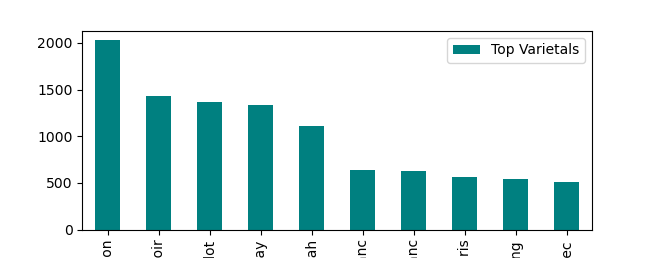

In [21]:
# Varietals Plots
# Plot Varietals Count by country
# Top 10 Varietals Types 

# Set x axis and tick locations
top10_varietals_split.plot(kind="bar", facecolor="teal", figsize=(5,2))

<IPython.core.display.Javascript object>


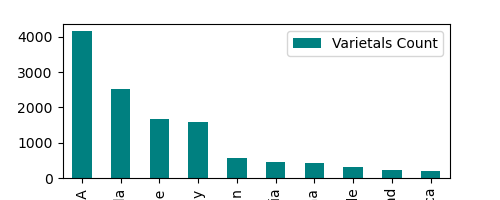

In [22]:
top10_varietals.plot(kind="bar", facecolor="teal", figsize=(5,2))